In [ ]:
%matplotlib inline


# Dimensionality Reduction with Neighborhood Components Analysis

Sample usage of Neighborhood Components Analysis for dimensionality reduction.

This example compares different (linear) dimensionality reduction methods
applied on the Digits data set. The data set contains images of digits from
0 to 9 with approximately 180 samples of each class. Each image is of
dimension 8x8 = 64, and is reduced to a two-dimensional data point.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

Neighborhood Components Analysis (NCA) tries to find a feature space such
that a stochastic nearest neighbor algorithm will give the best accuracy.
Like LDA, it is a supervised method.

One can see that NCA enforces a clustering of the data that is visually
meaningful despite the large reduction in dimension.


In [12]:
import os
import numpy as np
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np


path = r"D:\COVID\result\all_compare\mat"

Data_ver=['COVID','healthy','dyspnea_normal','dyspnea_exercise','sleep'] 
# Join various path components
path_t=os.path.join(path, Data_ver[0]+'_feat.mat')
data = sio.loadmat(path_t)
feat_acc_covid=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_covid=data['EpochFeat_sel_ncs_all_p']
p_ncs_covid=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_covid=data['p_num_acc_all_p']

path_t=os.path.join(path, Data_ver[1]+'_feat.mat')
data = sio.loadmat(path_t)
feat_acc_healthy=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_healthy=data['EpochFeat_sel_ncs_all_p']
p_ncs_healthy=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_healthy=data['p_num_acc_all_p']

path_t=os.path.join(path, Data_ver[2]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Normal=data['EpochFeat_ncs_all'] # 3 optimal channels, choose 0 channel first  
feat_bio_dysp_Normal=data['EpochFeat_bio_all']
p_ncs_dysp_Normal=data['case_num_ncs']  # number of participant of every feature 
p_acc_dysp_Normal=data['case_num_ncs']

path_t=os.path.join(path, Data_ver[3]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Exercise=data['EpochFeat_ncs_all'] 
feat_bio_dysp_Exercise=data['EpochFeat_bio_all']
p_ncs_dysp_Exercise=data['case_num_ncs'] 
p_acc_dysp_Exercise=data['case_num_ncs']

path_t=os.path.join(path, Data_ver[4]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_sleep_Normal=data['featureNCS_0']
feat_ncs_sleep_Disorder=data['featureNCS_1']
p_ncs_sleep_Normal=data['caseNumNCS_0']
p_ncs_sleep_Disorder=data['caseNumNCS_1']

feat_psg_sleep_Normal=data['featurePSG_0']
feat_psg_sleep_Disorder=data['featurePSG_1']
p_psg_sleep_Normal=data['caseNumPSG_0']
p_psg_sleep_Disorder=data['caseNumPSG_1']



# model 1: binary class  only label normal =1, exercise =0  in dyspnea study 
label_ncs_dysp_Exercise=p_ncs_dysp_Exercise
label_ncs_dysp_Exercise[:]=1

label_ncs_dysp_Normal=p_ncs_dysp_Normal
label_ncs_dysp_Normal[:]=0

X_train=np.vstack((feat_ncs_dysp_Normal,feat_ncs_dysp_Exercise))
y_train=np.vstack((label_ncs_dysp_Normal,label_ncs_dysp_Exercise)).ravel()

X_test=feat_acc_covid[:,:51,0]
y_test=p_acc_covid
y_test[:]=

y_test=y_test.ravel()


X_test2=feat_acc_healthy[:,:51,0]
n_classes = len(np.unique(y_train))
y_test2=p_acc_healthy.ravel()
y_test2[:]=0

y_test=np.hstack((y_test,y_test2))
X_test=np.vstack((X_test,X_test2))

explained variance ratio (first two components): [0.76791295 0.08134925]
0
1


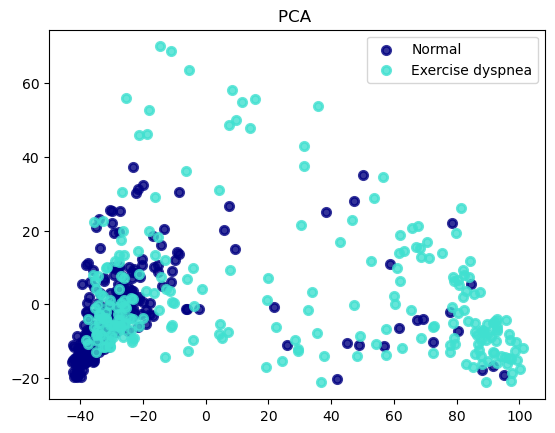

<Figure size 640x480 with 0 Axes>

In [33]:
# License: BSD 3 clause
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
l_names_train=['Normal','Exercise dyspnea']
l_names_test=['healthy','COVID']

l_names_all=l_names_test+ l_names_train
l_names=l_names_train

colors = ["navy", "turquoise",'red','orange','green']

X=np.vstack((X_test,X_train))
y=np.hstack((y_test,y_train+2))
X=X_test
y=y_test
X=X_train
y=y_train

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)



# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()

lw = 2

for color, i, target_name in zip(colors, [0, 1], y):
    print(i)
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=l_names[i]
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA ")

plt.figure()


plt.show()

explained variance ratio (first two components): [0.76131716 0.1378024 ]
0
1
2
3


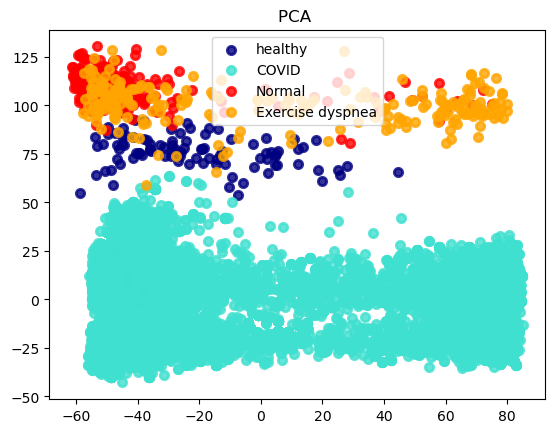

<Figure size 640x480 with 0 Axes>

In [34]:
l_names_all=l_names_test+ l_names_train
l_names=l_names_train

colors = ["navy", "turquoise",'red','orange','green']

X=np.vstack((X_test,X_train))
y=np.hstack((y_test,y_train+2))


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)



# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()

lw = 2

for color, i, target_name in zip(colors, [0, 1,2,3], y):
    print(i)
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=l_names_all[i]
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA ")

plt.figure()


plt.show()

In [24]:
print(np.unique(y))

[0 1 2 3]
